## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

### Read reviews data

In [2]:
con=open("../data/Samsung.txt",'r', encoding="utf-8")
samsung_reviews=con.read()
con.close()

<img src = "./images/results.png">

<img src = "./images/keywords.png">

### We can use a simple hueristic
 - Find out what were the most common words that appeared before and after each mention of `product feature`
 - Use regex pattern to extract this information

In [3]:
import re
s1 = "The battery was great."

The `battery` was ===> Prefix `keyword` Suffix

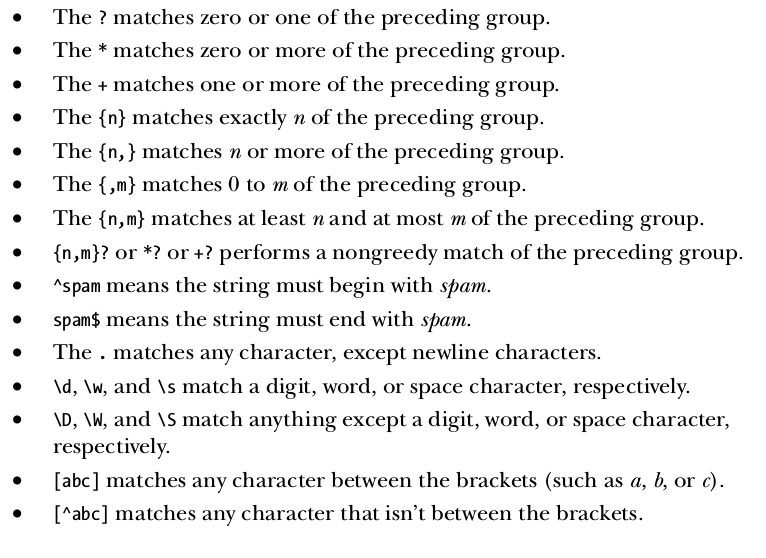<img src="./images/regex.png">

In [4]:
pattern = re.compile("\w+\sbattery\s\w+")

In [5]:
re.findall(pattern,s1)

['The battery was']

In [6]:
re.findall(pattern,s1)[0]

'The battery was'

In [7]:
re.findall(pattern,s1)[0].split(" ")

['The', 'battery', 'was']

In [8]:
re.findall(pattern,s1)[0].split(" ")[0] ## prefix

'The'

In [9]:
re.findall(pattern,s1)[0].split(" ")[-1] ## suffix

'was'

#### Extract all the prefixes and suffixes of `battery`

In [10]:
prefixes_suffixes = re.findall(pattern,samsung_reviews)

In [11]:
prefixes_suffixes[0:10]

['that battery life',
 'The battery was',
 'great battery life',
 'removable battery or',
 'the battery in',
 'The battery was',
 'the battery is',
 'Excellent battery life',
 'the battery off',
 'the battery goes']

In [12]:
prefixes_suffixes[0].split(" ")

['that', 'battery', 'life']

In [13]:
prefixes = []
suffixes = []
for p in prefixes_suffixes:
    l = p.split(" ")
    prefixes.append(l[0].lower())
    suffixes.append(l[-1].lower())

In [14]:
pd.Series(prefixes).value_counts().head(5)

the      1396
good      122
great      90
and        82
long       60
dtype: int64

In [15]:
pd.Series(suffixes).value_counts().head(5)

life     1052
is        210
and       146
lasts      83
was        66
dtype: int64

### This doesn't make much sense as these are commonly used words. Let's remove `stopwords` and see what we get

<a href = "https://gist.github.com/sebleier/554280">Get Stop Words</a>

In [16]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [17]:
prefixes = [p for p in prefixes if p not in stop_words]
suffixes = [s for s in suffixes if s not in stop_words]

In [18]:
pd.Series(prefixes).value_counts().head(5)

good         122
great         90
long          60
new           51
removable     48
dtype: int64

In [19]:
pd.Series(suffixes).value_counts().head(5)

life     1052
lasts      83
last       53
doesn      40
runs       31
dtype: int64

### Lets pretty print

In [20]:
prefixes=pd.Series(prefixes).value_counts().head(5).index
suffixes=pd.Series(suffixes).value_counts().head(5).index

In [21]:
pd.DataFrame({'prefixes':prefixes,'keyword':['battery']*len(prefixes),'suffixes':suffixes})

,prefixes,keyword,suffixes
0,good,battery,life
1,great,battery,lasts
2,long,battery,last
3,new,battery,doesn
4,removable,battery,runs


### Lets put all this logic in a function

In [22]:
def get_context(reviews,keyword):
    pattern = re.compile(f"\w+\s{keyword}\s\w+")
    prefixes_suffixes = re.findall(pattern,reviews)
    prefixes = []
    suffixes = []
    for p in prefixes_suffixes:
        l = p.split(" ")
        prefixes.append(l[0].lower())
        suffixes.append(l[-1].lower())
    prefixes = [p for p in prefixes if p not in stop_words]
    suffixes = [s for s in suffixes if s not in stop_words]
    prefixes=pd.Series(prefixes).value_counts().head(5).index
    suffixes=pd.Series(suffixes).value_counts().head(5).index
    return pd.DataFrame({'prefixes':prefixes,'keyword':[f'{keyword}']*len(prefixes),'suffixes':suffixes})

In [23]:
get_context(samsung_reviews,"battery")

,prefixes,keyword,suffixes
0,good,battery,life
1,great,battery,lasts
2,long,battery,last
3,new,battery,doesn
4,removable,battery,runs


In [24]:
get_context(samsung_reviews,"screen")

,prefixes,keyword,suffixes
0,touch,screen,protector
1,big,screen,size
2,great,screen,resolution
3,large,screen,protectors
4,home,screen,quality


## Summary:
    - Simple hueristics sometime are very usefull
    - Regex can be life saviours
    - Don't forget to use simple text processing while trying to solve a non-trival problem